### EDA on NYC Taxi trip

In [2]:
# import all the required lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [3]:
#reading data
df=pd.read_csv('/content/drive/MyDrive/avidya/nyc_taxi_trip_duration.csv')

In [4]:
df.shape

(729322, 11)

In [5]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

**Demograpic Info** : id, vendor id, passenger count
**trip info** : pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag **Target** : trip duration

In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [9]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


nominal value : vendor id , passenger count
categorical : store_and_fwd_flag

In [10]:
non_num_cols=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(df[non_num_cols].count())

id                    729322
pickup_datetime       729322
dropoff_datetime      729322
store_and_fwd_flag    729322
dtype: int64


In [12]:
# to make date time analysis easier
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df['pickup_datetime'].head()

0   2016-02-29 16:40:21
1   2016-03-11 23:35:37
2   2016-02-21 17:59:33
3   2016-01-05 09:44:31
4   2016-02-17 06:42:23
Name: pickup_datetime, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

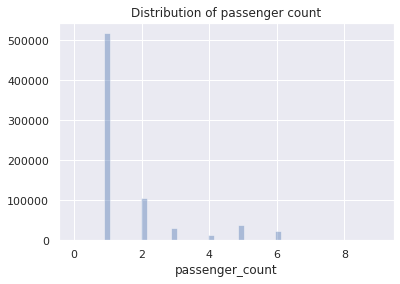

In [15]:
# a histogram of passenger count
sns.distplot(df['passenger_count'], kde=False)
plt.title("Distribution of passenger count")
plt.show

In [17]:
# distribution of pickup and drop off 
df['pickup_datetime'].nunique()
df['dropoff_datetime'].nunique()

709308

In [19]:
# converting the datetime to day of week 
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['pickup_day'].head()

0       Monday
1       Friday
2       Sunday
3      Tuesday
4    Wednesday
Name: pickup_day, dtype: object

In [20]:
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['dropoff_day']

0            Monday
1            Friday
2            Sunday
3           Tuesday
4         Wednesday
            ...    
729317     Saturday
729318       Monday
729319       Friday
729320       Sunday
729321       Friday
Name: dropoff_day, Length: 729322, dtype: object

In [22]:
df['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64

In [23]:
df['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

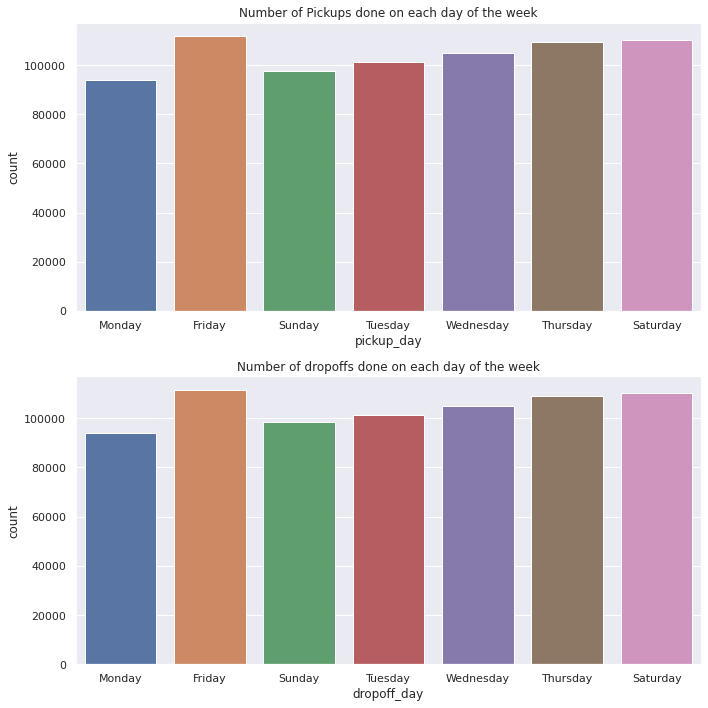

In [24]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [25]:
# distribution during hours of the day
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [27]:
df['pickup_timezone']

0            evening
1         late night
2            evening
3            morning
4            morning
             ...    
729317        midday
729318    late night
729319       evening
729320       morning
729321       evening
Name: pickup_timezone, Length: 729322, dtype: object

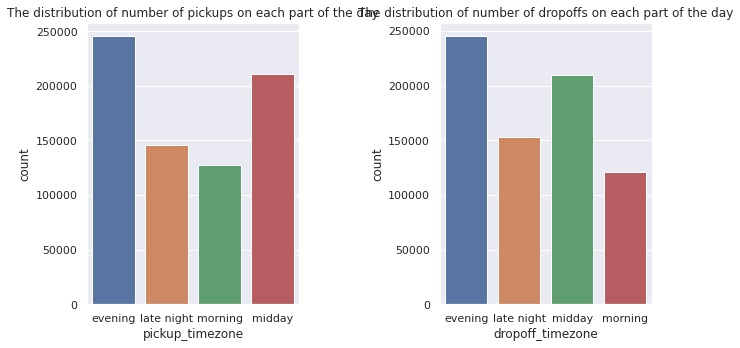

In [26]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

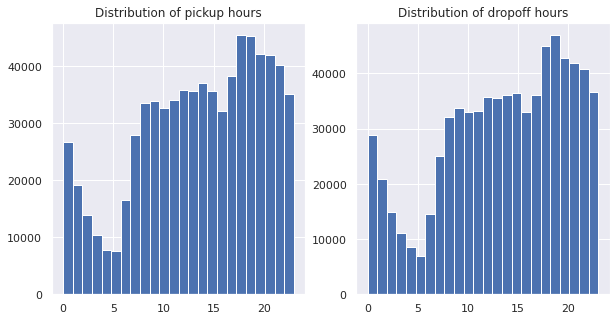

In [28]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

In [29]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

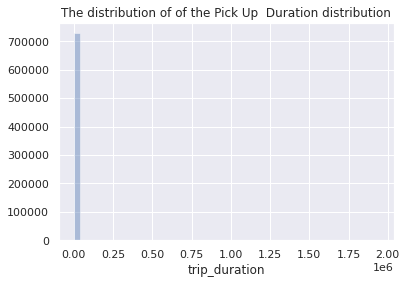

In [33]:
# distribution of trip duration 
sns.distplot( df['trip_duration'], kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

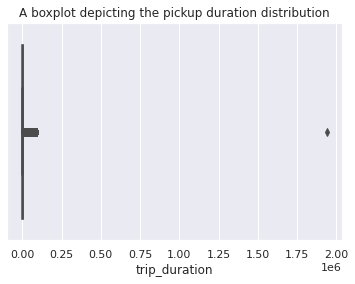

In [36]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

In [37]:
print( df['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


In [38]:
# droping the outlier value 
df=df[df.trip_duration!=df.trip_duration.max()]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

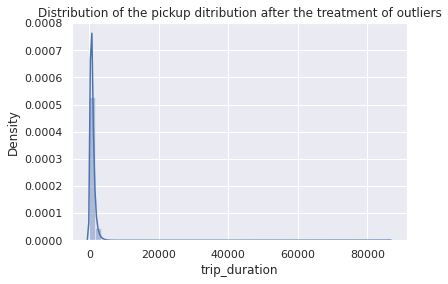

In [39]:
# distribution after removing outlier
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

right skewness observer in the graph

In [40]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of Pick up Longitude')

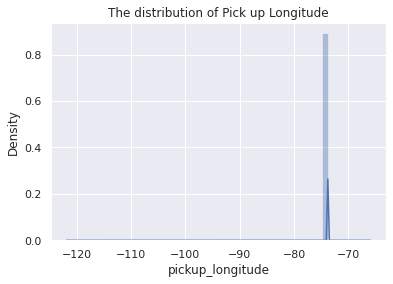

In [41]:
# distribution of pickup longitude
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of Drop off Longitude')

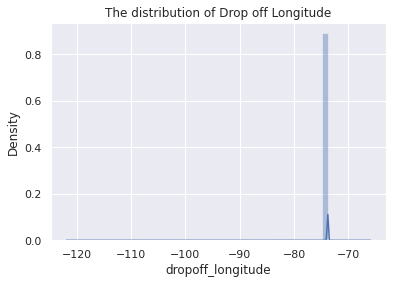

In [43]:
# distribution of dropoff logitude
sns.distplot(df['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DIstribution of Dropoff latitude')

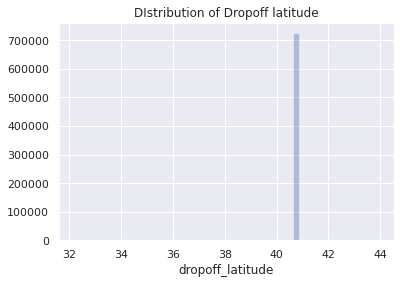

In [44]:
# distribution of dropoff latitude
sns.distplot(df['dropoff_latitude'], kde=False)
plt.title("DIstribution of Dropoff latitude")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of panel latitude')

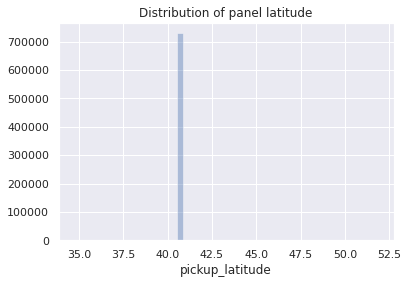

In [45]:
#distribution of pickup latitude
sns.distplot(df['pickup_latitude'], kde=False)
plt.title('Distribution of panel latitude')

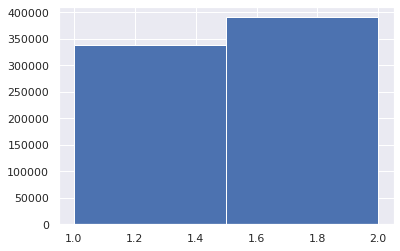

In [46]:
df['vendor_id'].hist(bins=2)

# **Bivariate Analysis**

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

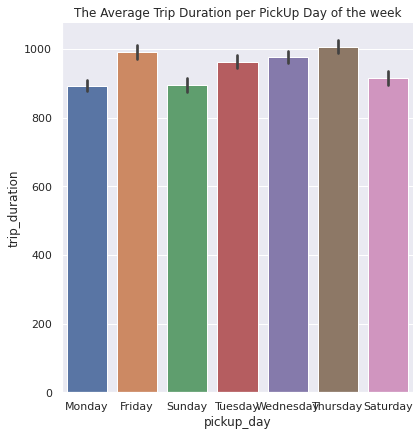

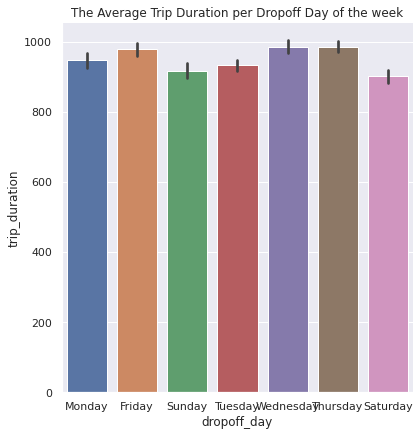

In [47]:
# relationsip between trip duration and day of week
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

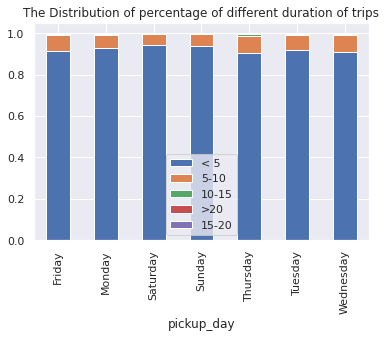

In [48]:
# percentage of short, medium, long trips
ax1=df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

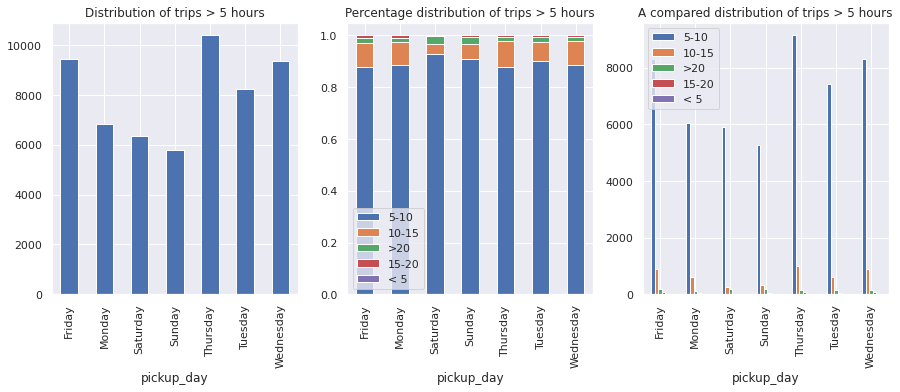

In [49]:
# percentage of only short trips
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')
ax2=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')
ax3=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


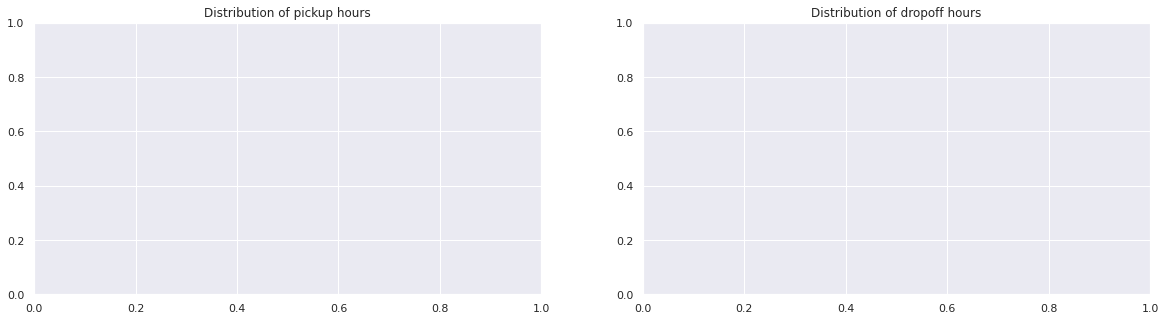

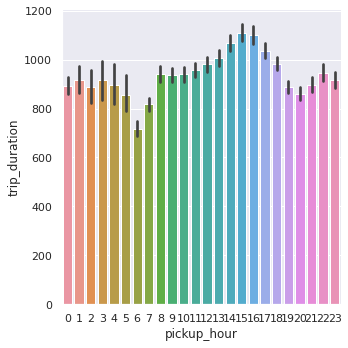

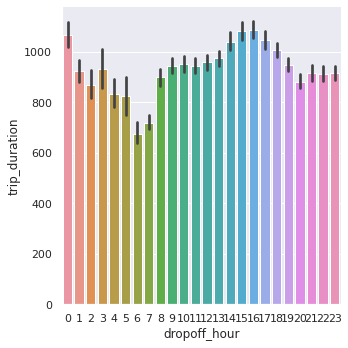

In [50]:
# relation b/w duration and time of the day
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Distribution of pickup hours')
ax=sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=df,ax=ax1)
ax2.set_title('Distribution of dropoff hours')
ax=sns.catplot(x="dropoff_hour", y="trip_duration",kind="bar",data=df,ax=ax2)
plt.show()

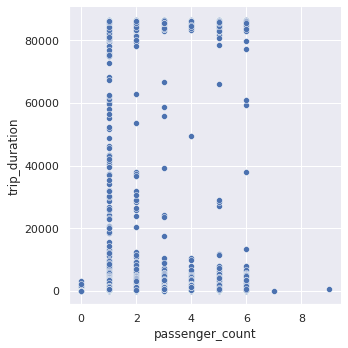

In [51]:
# passenger count ad duration
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")

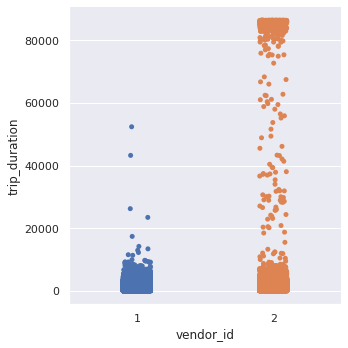

In [52]:
# vendor id and duration 
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

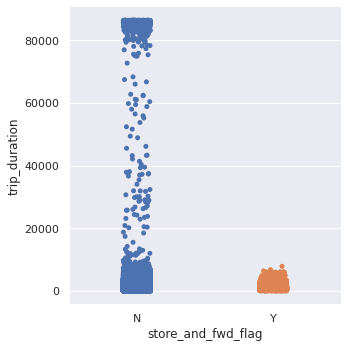

In [53]:
# catplot and duration
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

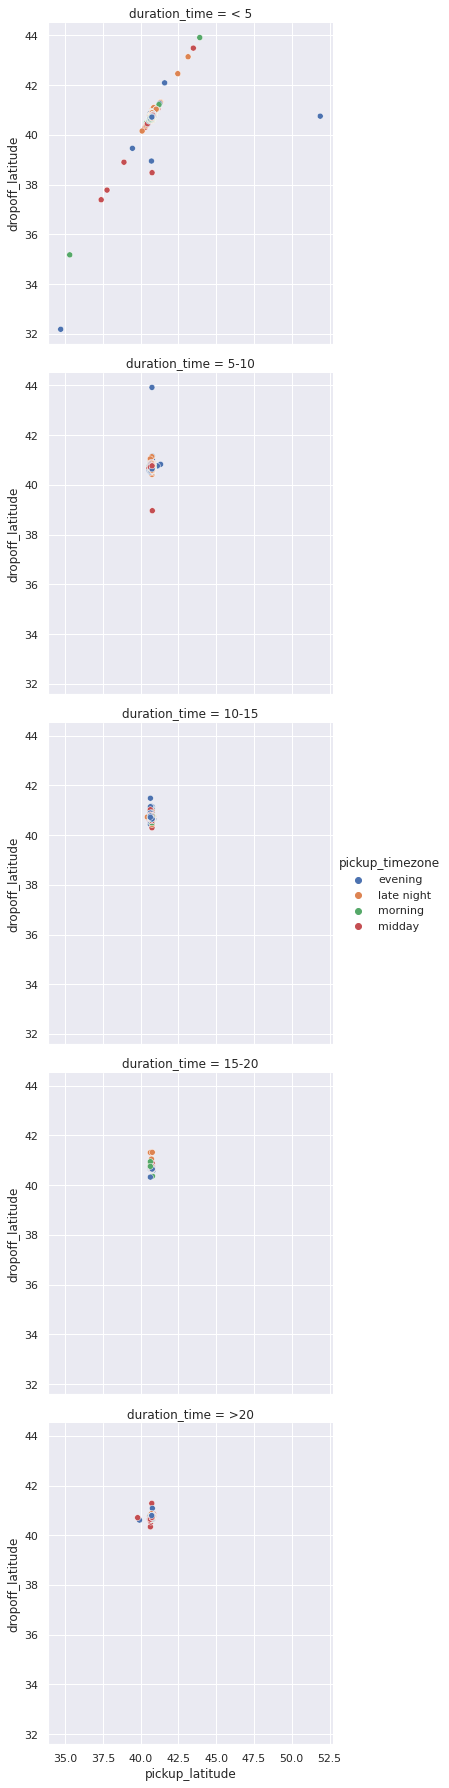

In [54]:
#location and duration 
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=df);

    **Conclusion of EDA **
    
    1.Trip Duration varies a lot ranging from few seconds to more than 20 hours
    2.Most trips are taken on Friday , Saturday and Thursday
    The average duration of a trip is most on Thursday and Friday as trips longer than 5 hours are mostly taken in these days
    3.The average duration of trips started in between 14 hours and 17 hours is the largest.
    4.Vendor 2 mostly provides the longer trips
    5.The long duration trips(> 5 hours) are mostly concentrated with their pickup region near (40 °,75 °) to (42°,75°)



